## Importing the required libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

## Read csv file (dataset -> IRIS)

In [195]:
iris = pd.read_csv('IRIS.csv')

In [196]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Features

In [197]:
# 1.sepal length in cm
# 2.sepal width in cm
# 3.petal length in cm
# 4.petal width in cm
# 5.class:
#   a.-- Iris Setosa
#   b.-- Iris Versicolour
#   c.-- Iris Virginica

# The Iris Dataset consists of 50 samples each of three different
# species of iris flower: setosa, versicolor and virginica.
# It contains four different measurements for each sample in centimetres
# - the length and width of sepals and petals - making it a multivariate dataset.

In [198]:
# to ignre the warning
import warnings
warnings.filterwarnings('ignore')

## Data Discovery

In [199]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [200]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [201]:
# value_counts to know how many flowers of the species there are
iris["species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [202]:
# Basic statistical features of the dataset as a whole.
iris.describe()
#All  the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Cleaning

In [203]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##  Data visualization

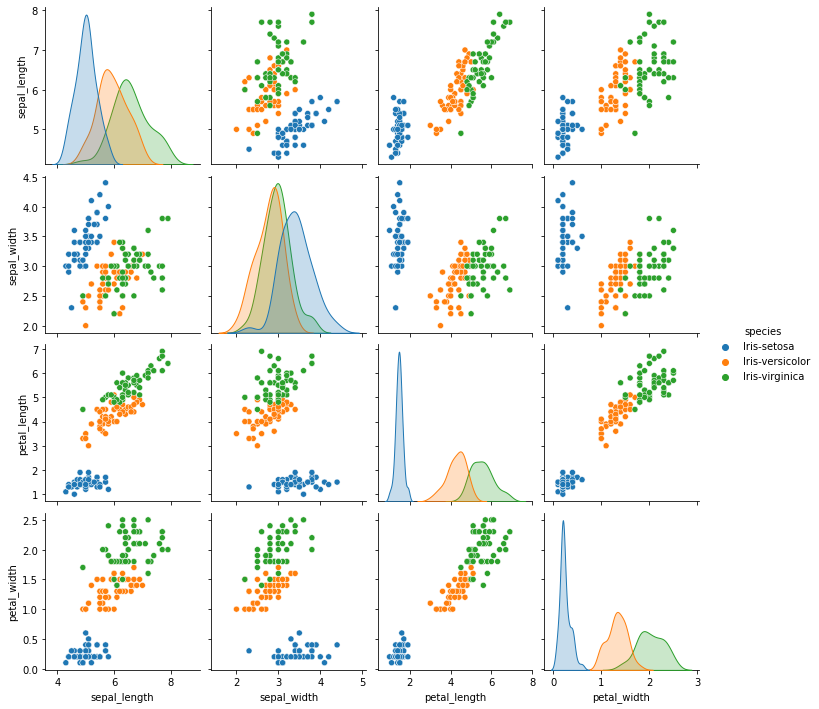

In [204]:
# Initial visual observation of the measurements and relationships between them.
sns.pairplot(iris, hue = 'species') 
plt.show()

In [205]:
# It may be beneficial at this stage to visualise the data
# and the relationships between measurements to see
# if any patterns emerge.
# For this I utilised a seaborn pair plot ,
# which pairs every feature with every other feature,
# distinguished by object-type.
# A pair plot outputs a mixture of two-dimensional scatter plots,
# that show the relationships between measurements,
# and univariate histograms that show the distribution
# of each measurement separated by species.

# Straightaway we can see that iris setosa (blue) appears visually to
# be quite separate from the other two species in virtually all
# scatter plot feature combinations,
# but most drastically in petal measurements.
# While there is quite a bit of observable overlap between versicolor (orange)
# and virginica (green), particularly in terms of sepal measurements, 
# setosa appears to be significantly linearly distinct.
# Petal length and width and sepal length in the setosa are significantly smaller
# than those of either versicolor or virginica,
# as we can see in the histograms where the setosa data is much closer 
# to the left of each graph.

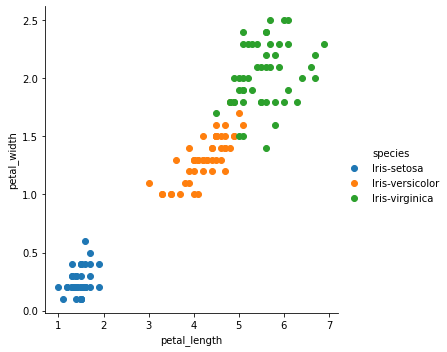

In [206]:
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter,
                    'petal_length', 'petal_width').add_legend()
plt.show()

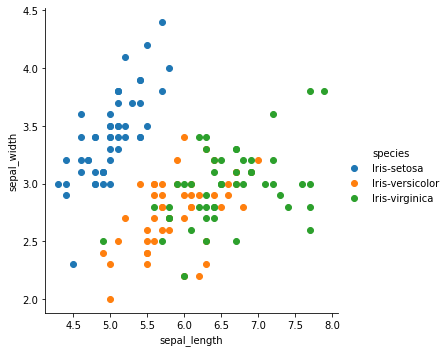

In [207]:
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter,
                'sepal_length', 'sepal_width').add_legend()
plt.show()

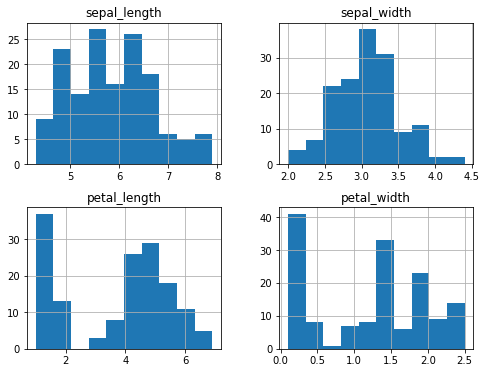

In [208]:
# Histogram of all measurements across all species.
#We can also create a histogram of each input variable
#to get an idea of the distribution.
iris.hist(figsize = (8, 6))
plt.show()

In [209]:
# Correlations between measurements.
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


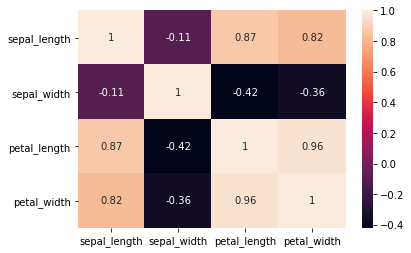

In [210]:
# Visualising correlations with a heatmap.
sns.heatmap(iris.corr(), annot = True) 
plt.show()

## Univariate Plots

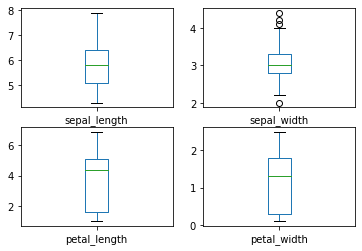

In [211]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
#This gives us a much clearer idea of the distribution of the input attributes:
#we can find the : Q1 , Q2=MEAN , Q3 , OUTLIERS , IQR Q3-Q1.

## Handling Text and Categorical Attributes

In [212]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
iris['species']=labelencoder.fit_transform(iris['species'])
cut_ord ={index: label for index,label in enumerate(labelencoder.classes_)}
cut_ord

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

### split the data into independent 'X' and dependent 'y' variables

In [213]:
X=iris.drop('species' ,axis=1)
y=iris['species']

In [214]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [215]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

## Feature Scaling

In [216]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Create a Test Set and Train Set

In [350]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    ,random_state=42)

## Select and Train a Model

## DecisionTreeClassifier

In [351]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score

DecisionTree = DecisionTreeRegressor(random_state=0)
DecisionTree.fit(X_train, y_train)
y_pred = model.predict(X_test)
score0 =accuracy_score(y_test,y_pred)
percentage0 = score0 * 100
print('The accuracy of the DecisionTreeRegressor is',)
print("%.3f" % percentage0, "%")

The accuracy of the DecisionTreeRegressor is
100.000 %


In [352]:
from sklearn.metrics import confusion_matrix,classification_report
report=classification_report(y_test,y_pred)
print("DecisionTreeClassifier report \n",report)

DecisionTreeClassifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(33.0, 0.5, 'Truth')

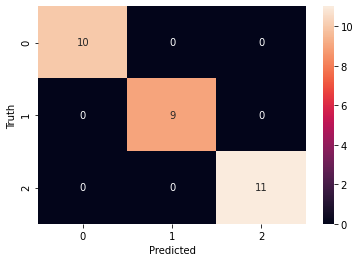

In [353]:
cm=confusion_matrix(y_test,y_pred )
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Logistic Regression

In [354]:
from sklearn.linear_model import LogisticRegression
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)
y_pred = Logistic.predict(X_test)
score1 =accuracy_score(y_test,y_pred)
percentage1 = score1 * 100
print('The accuracy of the Logistic Regressionr is',)
print("%.3f" % percentage1, "%")

The accuracy of the Logistic Regressionr is
100.000 %


In [355]:
report=classification_report(y_test,y_pred)
print("Logistic Regression report \n",report)

Logistic Regression report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(33.0, 0.5, 'Truth')

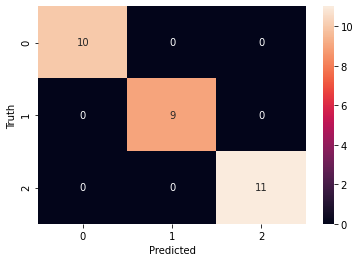

In [356]:
cm=confusion_matrix(y_test,y_pred )
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Support Vector classifier (linear kernal)

In [357]:
from sklearn.svm import SVC
svc =SVC(kernel="linear")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score2 =accuracy_score(y_test,y_pred)
percentage2 = score2 * 100
print('The accuracy of the Support Vector classifier (linear kernal) is',)
print("%.3f" % percentage2, "%")

The accuracy of the Support Vector classifier (linear kernal) is
100.000 %


In [358]:
report=classification_report(y_test,y_pred)
print("Support Vector classifier (linear kernal) report \n",report)

Support Vector classifier (linear kernal) report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(33.0, 0.5, 'Truth')

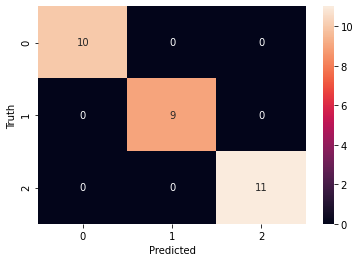

In [359]:
cm=confusion_matrix(y_test,y_pred )
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Support Vector classifier (RBF kernal)

In [360]:
from sklearn.svm import SVC
svc_rbf =SVC(kernel="rbf")
svc_rbf.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score3 =accuracy_score(y_test,y_pred)
percentage3 = score3 * 100
print('The accuracy of the Support Vector classifier (RBF kernal) is')
print("%.3f" % percentage3, "%")

The accuracy of the Support Vector classifier (RBF kernal) is
100.000 %


In [361]:
report=classification_report(y_test,y_pred)
print("Support Vector classifier (RBF kernal) report \n",report)

Support Vector classifier (RBF kernal) report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(33.0, 0.5, 'Truth')

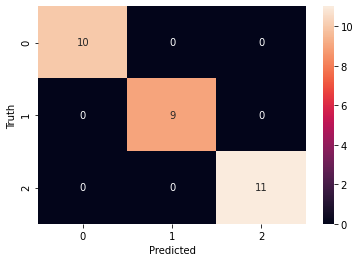

In [362]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## KNeighborsClassifier

In [363]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score4 =accuracy_score(y_test,y_pred)
percentage4 = score4 * 100
print('The accuracy of the KNeighborsClassifier is')
print("%.3f" % percentage4, "%")

The accuracy of the KNeighborsClassifier is
100.000 %


In [364]:
report=classification_report(y_test,y_pred)
print("KNeighborsClassifier report \n",report)

KNeighborsClassifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(33.0, 0.5, 'Truth')

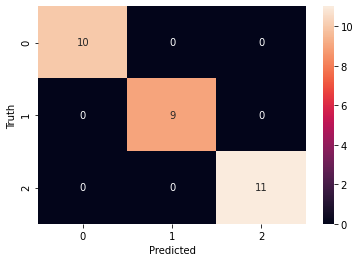

In [365]:
cm=confusion_matrix(y_test,y_pred )
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## RandomForestClassifier

In [366]:
from sklearn.ensemble import RandomForestClassifier
Random_forest=RandomForestClassifier()
Random_forest.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score5 =accuracy_score(y_test,y_pred)
percentage5 = score5 * 100
print('The accuracy of the RandomForestClassifier is')
print("%.3f" % percentage5, "%")

The accuracy of the RandomForestClassifier is
100.000 %


In [367]:
report=classification_report(y_test,y_pred)
print("RandomForestClassifier report \n",report)

RandomForestClassifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(33.0, 0.5, 'Truth')

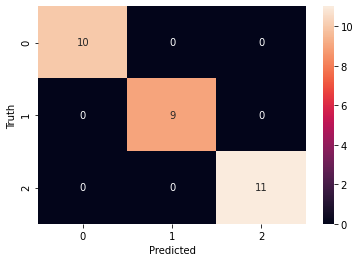

In [368]:
cm=confusion_matrix(y_test,y_pred )
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## GaussianNB

In [369]:
from sklearn.naive_bayes  import GaussianNB
Gauss =GaussianNB()
Gauss.fit(X_train,y_train)
y_pred = svc.predict(X_test)
score6 =accuracy_score(y_test,y_pred)
percentage6 = score6 * 100
print('The accuracy of the GaussianNB is')
print("%.3f" % percentage6, "%")

The accuracy of the GaussianNB is
100.000 %


In [370]:
report=classification_report(y_test,y_pred)
print("GaussianNB  report \n",report)

GaussianNB  report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(33.0, 0.5, 'Truth')

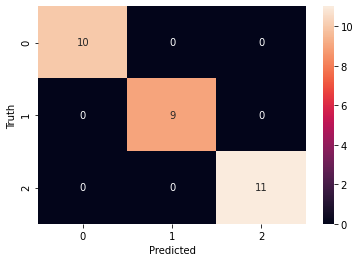

In [371]:
cm=confusion_matrix(y_test,y_pred )
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [372]:
models = pd.DataFrame({
    'Model': [ 'Random Forest' ,'Logistic Regression',
              'Desicion Tree','KNN','SVC(linear kernal)','SVC(RBF kernal)',
              "GaussianNB"],
    'Score': [percentage0,percentage1,percentage2,percentage3,
              percentage4,percentage5,percentage6]})
models.sort_values(by='Score', ascending=True)

,Model,Score
0,Random Forest,100.0
1,Logistic Regression,100.0
2,Desicion Tree,100.0
3,KNN,100.0
4,SVC(linear kernal),100.0
5,SVC(RBF kernal),100.0
6,GaussianNB,100.0
